# Classification Example

## Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, make_scorer

# Validation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Load Data

In [11]:
# Load the dataset directly from sklearn's datasets
data = load_breast_cancer()
df = pd.DataFrame(data=np.c_[ data.data, data.target ],  
                  columns=np.append(data.feature_names, 'target'))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
df.shape

(569, 31)

## Train / Test

In [1]:
X = df.drop('target', axis=1)
y = df['target']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

NameError: name 'df' is not defined

## Cross-validation

In [14]:
df['target'].value_counts()

target
1.0    357
0.0    212
Name: count, dtype: int64

In [15]:
# Declare KFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [16]:
# Declare scores to be used
scoring = {
    'Acc': make_scorer(accuracy_score),
    'Prec': make_scorer(precision_score),
    'Rec': make_scorer(recall_score)
}

In [17]:
def print_metrics(cv_results):
    for sc in scoring.keys():
        print(f'Train {sc}:', cv_results[f'train_{sc}'].mean().round(2))
    print()
    for sc in scoring.keys():
        print(f'Validation {sc}:', cv_results[f'test_{sc}'].mean().round(2))

## Baseline

In [18]:
from sklearn.dummy import DummyClassifier

In [19]:
bl = DummyClassifier(strategy='stratified')
bl_cv = cross_validate(bl, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(bl_cv)

Train Acc: 0.54
Train Prec: 0.63
Train Rec: 0.64

Validation Acc: 0.56
Validation Prec: 0.64
Validation Rec: 0.67


## Logistic Regression

In [20]:
lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=10_000))
])
lr_cv = cross_validate(lr, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(lr_cv)

Train Acc: 0.99
Train Prec: 0.99
Train Rec: 1.0

Validation Acc: 0.98
Validation Prec: 0.98
Validation Rec: 0.99


## K-Neighbours Classifier

In [21]:
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5, p=1))
])
knn_cv = cross_validate(knn, X_train, y_train, cv=kf,
                        scoring=scoring, return_train_score=True)

print_metrics(knn_cv)

Train Acc: 0.98
Train Prec: 0.97
Train Rec: 0.99

Validation Acc: 0.96
Validation Prec: 0.96
Validation Rec: 0.98


### Confusion Matrix Example

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

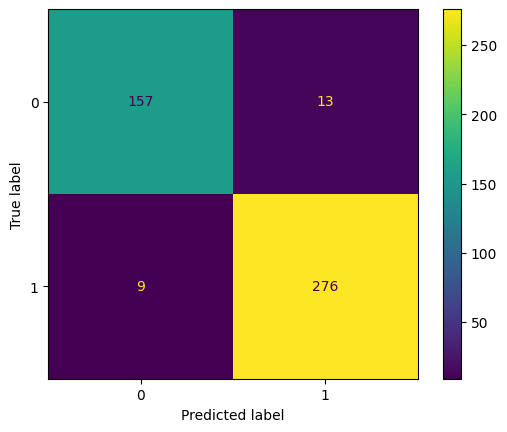

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
# cross_val_predict returns the predictions for each data point in the validation sets
val_preds = cross_val_predict(knn, X_train, y_train, cv=kf)

cm = confusion_matrix(y_train, val_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot()
plt.show()

## Decision Tree

In [25]:
from sklearn.tree import plot_tree

In [26]:
dt = DecisionTreeClassifier(max_depth=2)
dt_cv = cross_validate(dt, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(dt_cv)

Train Acc: 0.95
Train Prec: 0.97
Train Rec: 0.96

Validation Acc: 0.93
Validation Prec: 0.95
Validation Rec: 0.93


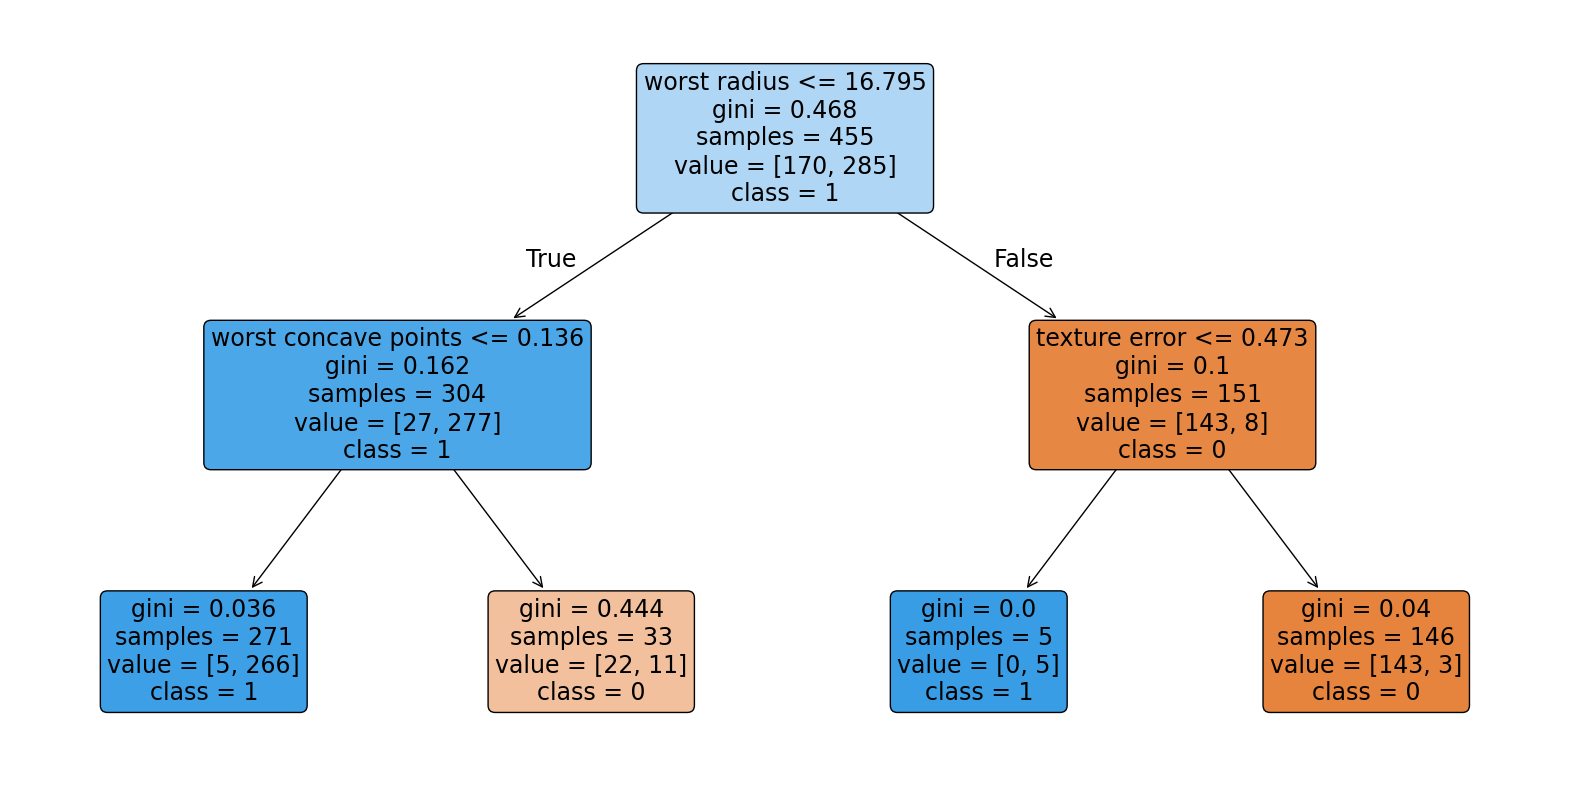

In [27]:
dt.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=list(X.columns),
          class_names=['0', '1'], rounded=True)
plt.show()

### Predicted Probabilities

`cross_val_predict()` function performs cross-validation and returns the predictions for each instance in the training set as if each instance were in a validation set:
- It splits the training data into multiple "folds" (validation sets).
- For each fold, it trains the model on the other folds (excluding the validation set).
- It then uses the model to make predictions on the validation set.
- Result: You get predictions for the entire training set, but importantly, the model never sees the instances it's predicting (they were always held out for validation during training).
- Returning probabilities: The `cross_val_predict()` function has an option to return class probabilities instead of just class predictions. You can enable this by setting `method="predict_proba"` in the function call. This provides the probabilities of each class for each instance, which can be useful when you want to assess the model's confidence in its predictions.

In [28]:
# This provides predictions for the entire training set, with each prediction made on data the model hasn’t seen during training
y_pred = cross_val_predict(dt, X_train, y_train, cv=kf)
y_pred

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0.

In [29]:
# This provides predicted probabilities for each class and instance on the entire training set, with each prediction made on data the model hasn’t seen during training
y_pred_prob = cross_val_predict(dt, X_train, y_train, cv=kf, method='predict_proba')
y_pred_prob

array([[0.03891051, 0.96108949],
       [0.97709924, 0.02290076],
       [0.02489627, 0.97510373],
       [0.02459016, 0.97540984],
       [0.03488372, 0.96511628],
       [0.02811245, 0.97188755],
       [0.02489627, 0.97510373],
       [0.0203252 , 0.9796748 ],
       [0.02459016, 0.97540984],
       [0.36842105, 0.63157895],
       [0.03488372, 0.96511628],
       [0.36842105, 0.63157895],
       [0.96428571, 0.03571429],
       [0.0203252 , 0.9796748 ],
       [0.98449612, 0.01550388],
       [0.028     , 0.972     ],
       [0.992     , 0.008     ],
       [0.02459016, 0.97540984],
       [0.992     , 0.008     ],
       [0.97709924, 0.02290076],
       [0.028     , 0.972     ],
       [0.03891051, 0.96108949],
       [0.03488372, 0.96511628],
       [0.992     , 0.008     ],
       [0.02489627, 0.97510373],
       [0.028     , 0.972     ],
       [0.575     , 0.425     ],
       [0.97727273, 0.02272727],
       [0.01659751, 0.98340249],
       [0.95683453, 0.04316547],
       [0.

In [32]:
# Check X_train
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994


In [34]:
# Check predicted probabilities
pd.DataFrame(
    y_pred_prob,
    columns=['prob_0', 'prob_1'],
    index=X_train.index).head()

,prob_0,prob_1
546,0.038911,0.961089
432,0.977099,0.022901
174,0.024896,0.975104
221,0.024590,0.975410
289,0.034884,0.965116
